In [ ]:
import xarray as xr
import numpy as np
import sys
from utils import *

def globann(da,a):
    return amean(gmean(fix_time(da),a))

def trefht(yr):
    files=lens_files('TREFHT','atm','h0',yr)
    tmp=xr.open_dataset(files[0])
    a=np.cos(np.deg2rad(tmp.lat))*(tmp.lon>-100)
    trefs=[]
    for f in files:
        ds=xr.open_dataset(f)
        trefs.append(globann(ds.TREFHT,a))
    t=xr.concat(trefs,dim='ens')
    return t




In [ ]:
yr=sys.argv[1]
t=trefht(yr)
d='/glade/derecho/scratch/djk2120/postp/jas/'
fout=d+'TREFHT_global.'+str(yr)+'.nc'
xr.Dataset({'TREFHT_global':t}).to_netcdf(fout)

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [2]:
help(get_ds)

Help on function get_ds in module utils:

get_ds(exp, dvs, cmp='/lnd/', tape='h0', a=slice(10, 60, None), o=slice(225, 300, None), parallel=True)



In [3]:
client=get_cluster()

In [10]:
ds=get_ds('2020_lens',dvs=['TREFHT'],cmp='/atm/',a=slice(-90,90),o=slice(0,360))

In [17]:
a=np.cos(np.deg2rad(ds.lat))*(ds.lon>-100)

In [24]:
x=amean(gmean(ds.TREFHT,a))

In [56]:
def globann(da,a):
    return amean(gmean(fix_time(da),a))

In [67]:
def trefht(yr):
    files=lens_files('TREFHT','atm','h0',yr)
    tmp=xr.open_dataset(files[0])
    a=np.cos(np.deg2rad(tmp.lat))*(tmp.lon>-100)
    trefs=[]
    for f in files:
        ds=xr.open_dataset(f)
        trefs.append(globann(ds.TREFHT,a))
    t=xr.concat(trefs,dim='ens')

    return t

In [55]:
yr=sys.argv[1]
t=trefht(yr)
d='/glade/derecho/scratch/djk2120/postp/jas/'
fout=d+'TREFHT_global.'+str(yr)+'.nc'
xr.Dataset({'TREFHT_global':t}).to_netcdf(fout)


In [46]:
files[0]

'/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/TREFHT/b.e21.BSSP370cmip6.f09_g17.LE2-1001.001.cam.h0.TREFHT.201501-202412.nc'

In [41]:
ds=xr.open_mfdataset(files,combine='nested',concat_dim='ens',parallel=True,preprocess=preprocess)

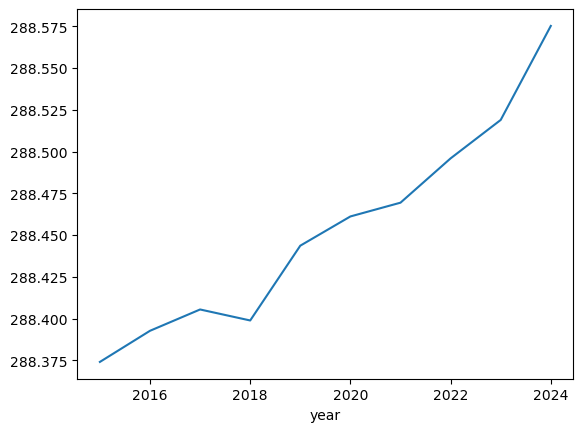

In [44]:
ds.mean(dim='ens').plot()

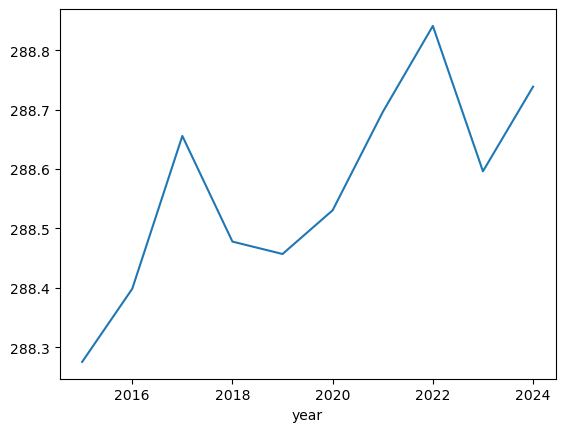

In [37]:
amean(gmean(ds.TREFHT,a)).plot()

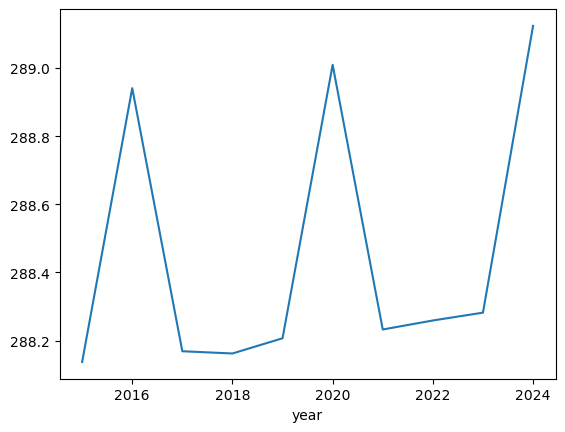

In [26]:
x.mean(dim='ens').plot()